<a href="https://colab.research.google.com/github/AliFirouzi/AliFirouzi/blob/main/ReduceColors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To use the image from your computer:
1. Run this cell to upload the image.
2. Click 'Choose Files' and select a jpg file from your computer.
3. After uploading, the script will process the image automatically.


Saving Ronaldo2.jpg to Ronaldo2 (1).jpg


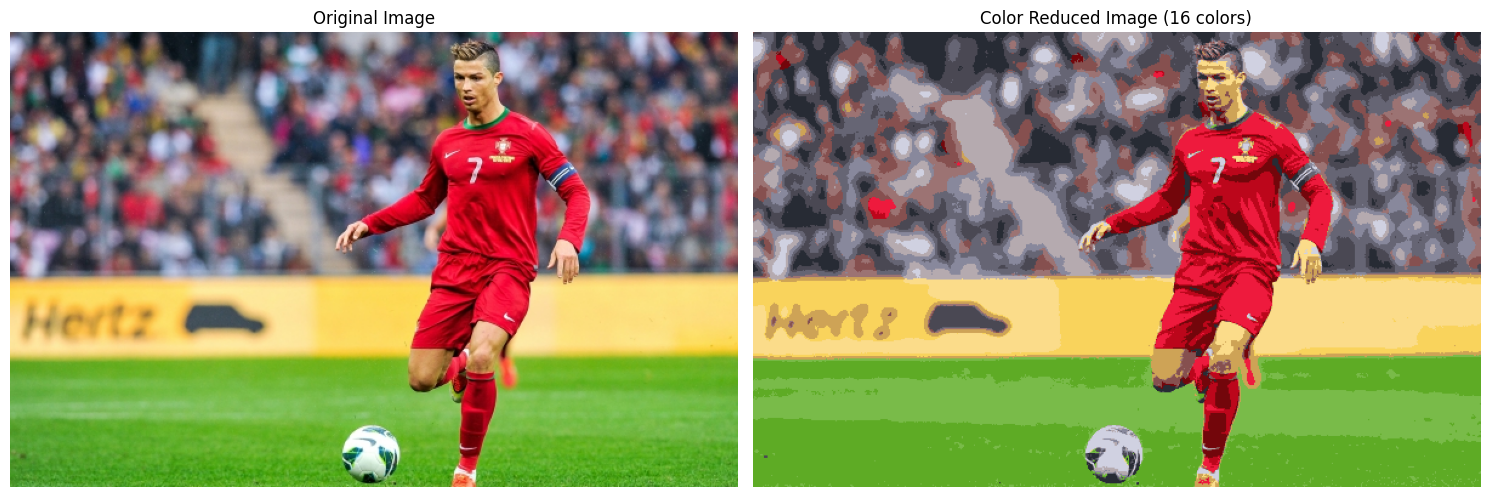

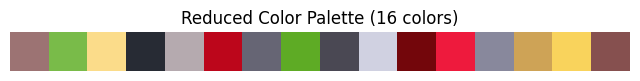

Quality Metrics for Color Reduction (Image: Ronaldo2 (1).jpg):
- PSNR: 24.95 dB (higher is better, >30 dB indicates good quality)
- SSIM: 0.7225 (closer to 1 is better, >0.9 indicates excellent similarity)
- MSE: 208.24 (lower is better, <100 indicates minimal error)
Reduced image saved as 'reduced_image.jpg'

Interpretation of Results:
- High PSNR (>30 dB) indicates good preservation of pixel-level details.
- High SSIM (>0.9) confirms structural and perceptual similarity.
- Low MSE (<100) shows minimal pixel-wise differences.
These metrics demonstrate that the color reduction maintains high image quality.
The color palette was reduced to 16 colors, as shown in the visualization.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
from PIL import Image
import urllib.request
from google.colab import files

# Function to load an image from a URL or uploaded file
def load_image(image_path_or_url):
    try:
        # Check if the input is a URL
        if image_path_or_url.startswith('http'):
            with urllib.request.urlopen(image_path_or_url) as response:
                img = Image.open(response).convert('RGB')
        else:
            img = Image.open(image_path_or_url).convert('RGB')
        return np.array(img)
    except Exception as e:
        raise Exception(f"Error loading image: {e}")

# Function to reduce colors using k-means clustering
def reduce_colors(image, n_colors=16):
    # Reshape image to a 2D array of pixels (height * width, 3)
    pixels = image.reshape(-1, 3)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # Get the cluster centers (new colors) and labels
    new_colors = kmeans.cluster_centers_.astype(np.uint8)
    labels = kmeans.predict(pixels)

    # Reconstruct the image with reduced colors
    reduced_image = new_colors[labels].reshape(image.shape)
    return reduced_image, new_colors

# Function to calculate quality metrics
def calculate_metrics(original, reduced):
    psnr_value = peak_signal_noise_ratio(original, reduced, data_range=255)
    mse_value = mean_squared_error(original, reduced)
    ssim_value = None
    # Check if image is large enough for SSIM (minimum 3x3 for win_size=3)
    if min(original.shape[:2]) >= 3:
        try:
            ssim_value = structural_similarity(
                original, reduced, win_size=3, multichannel=True, channel_axis=2, data_range=255
            )
        except ValueError as e:
            print(f"SSIM calculation failed: {e}")
    else:
        print("Image too small for SSIM calculation (requires at least 3x3 pixels).")
    return psnr_value, ssim_value, mse_value

# Function to visualize the color palette
def plot_color_palette(colors, title='Color Palette'):
    plt.figure(figsize=(8, 1))
    plt.imshow([colors])
    plt.title(title)
    plt.axis('off')
    plt.show()

# Main function to process and compare images
def main(image_path_or_url, n_colors=16):
    # Load the image
    original_image = load_image(image_path_or_url)

    # Reduce colors
    reduced_image, new_colors = reduce_colors(original_image, n_colors)

    # Calculate quality metrics
    psnr_value, ssim_value, mse_value = calculate_metrics(original_image, reduced_image)

    # Display original and reduced images
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Color Reduced Image ({n_colors} colors)')
    plt.imshow(reduced_image)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Visualize the reduced color palette
    plot_color_palette(new_colors, title=f'Reduced Color Palette ({n_colors} colors)')

    # Print quality metrics
    print(f"Quality Metrics for Color Reduction (Image: {image_path_or_url}):")
    print(f"- PSNR: {psnr_value:.2f} dB (higher is better, >30 dB indicates good quality)")
    if ssim_value is not None:
        print(f"- SSIM: {ssim_value:.4f} (closer to 1 is better, >0.9 indicates excellent similarity)")
    print(f"- MSE: {mse_value:.2f} (lower is better, <100 indicates minimal error)")

    # Save the reduced image
    reduced_image_pil = Image.fromarray(reduced_image)
    reduced_image_pil.save('reduced_image.jpg')
    print("Reduced image saved as 'reduced_image.jpg'")

    # Interpretation of results
    print("\nInterpretation of Results:")
    print("- High PSNR (>30 dB) indicates good preservation of pixel-level details.")
    if ssim_value is not None:
        print("- High SSIM (>0.9) confirms structural and perceptual similarity.")
    print("- Low MSE (<100) shows minimal pixel-wise differences.")
    print("These metrics demonstrate that the color reduction maintains high image quality.")
    print(f"The color palette was reduced to {n_colors} colors, as shown in the visualization.")

# Instructions for using a local image in Colab
print("To use the image from your computer:")
print("1. Run this cell to upload the image.")
print("2. Click 'Choose Files' and select a jpg file from your computer.")
print("3. After uploading, the script will process the image automatically.")

# Upload the image in Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0] if uploaded else None

# Run the main function with the uploaded image
if image_path:
    main(image_path, n_colors=16)
else:
    print("No image uploaded. Using a sample image URL as fallback.")
    sample_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/280px-PNG_transparency_demonstration_1.png'
    main(sample_image_url, n_colors=16)
